In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import ast

In [115]:
df = pd.read_csv("data_science_asia_clean.csv", index_col = 0)
df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,('University Courses (resulting in a universit...,"('Kaggle (notebooks, competitions, etc)',)",Master’s degree,1-3 years,"('Python', 'SQL')","(' PyCharm ', ' Jupyter Notebook')","('None',)","(' Matplotlib ', ' Seaborn ')",1-2 years,"(' Scikit-learn ',)","('Linear or Logistic Regression', 'Decision Tr...","('No, I do not download pre-trained model weig...",NaN
2,174,25-29,Woman,China,Yes,"('Kaggle Learn Courses', 'University Courses (...","('University courses', 'Online courses (Course...",Master’s degree,< 1 years,"('Python', 'MATLAB')","(' Visual Studio ', ' MATLAB ', ' Jupyter Note...","('Colab Notebooks', 'Google Cloud Vertex AI Wo...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"('Udemy',)","('Online courses (Coursera, EdX, etc)',)",Master’s degree,3-5 years,"('Python',)","(' Visual Studio Code (VSCode) ', ' Jupyter No...","(' Kaggle Notebooks', 'Colab Notebooks')","(' Seaborn ',)",2-3 years,"(' Scikit-learn ', ' PyTorch ', ' Xgboost ', ...","('Decision Trees or Random Forests', 'Dense Ne...","(' Huggingface Models ',)","('Kaggle (notebooks, forums, etc)',)"
4,283,22-24,Woman,China,Yes,('University Courses (resulting in a universit...,"('University courses', 'Social media platforms...",I prefer not to answer,< 1 years,"('Python', 'MATLAB', 'Other')","(' Visual Studio ', ' PyCharm ', ' MATLAB ')","('Google Cloud Vertex AI Workbench ',)","('None',)",Under 1 year,"(' TensorFlow ',)","('None',)","('Other storage services (i.e. google drive)',)","('Other',)"
5,492,40-44,Man,Japan,No,"('Kaggle Learn Courses',)","('Video platforms (YouTube, Twitch, etc)', 'Ka...",No formal education past high school,< 1 years,"('Python',)","(' Notepad++ ', ' Jupyter Notebook')","('None',)","('None',)",I do not use machine learning methods,NaN,NaN,NaN,"('Kaggle (notebooks, forums, etc)',)"


In [116]:
df.shape

(1538, 18)

In [117]:
def convert_to_tuple(value):
    if pd.notna(value):
        return ast.literal_eval(value)
    else:
        return value
for col in df.columns:
    check_value = df[col].iloc[0]
    if (pd.isnull(check_value)):
        i = 1
        while(pd.isnull(check_value)):
            check_value = df[col].iloc[i]
            i += 1
    if isinstance(check_value, str):
        if(check_value[0] == '('):
            df[col] = df[col].apply(convert_to_tuple)
df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,(University Courses (resulting in a university...,"(Kaggle (notebooks, competitions, etc),)",Master’s degree,1-3 years,"(Python, SQL)","( PyCharm , Jupyter Notebook)","(None,)","( Matplotlib , Seaborn )",1-2 years,"( Scikit-learn ,)","(Linear or Logistic Regression, Decision Trees...","(No, I do not download pre-trained model weigh...",NaN
2,174,25-29,Woman,China,Yes,"(Kaggle Learn Courses, University Courses (res...","(University courses, Online courses (Coursera,...",Master’s degree,< 1 years,"(Python, MATLAB)","( Visual Studio , MATLAB , Jupyter Notebook)","(Colab Notebooks, Google Cloud Vertex AI Workb...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"(Udemy,)","(Online courses (Coursera, EdX, etc),)",Master’s degree,3-5 years,"(Python,)","( Visual Studio Code (VSCode) , Jupyter Noteb...","( Kaggle Notebooks, Colab Notebooks)","( Seaborn ,)",2-3 years,"( Scikit-learn , PyTorch , Xgboost , Light...","(Decision Trees or Random Forests, Dense Neura...","( Huggingface Models ,)","(Kaggle (notebooks, forums, etc),)"
4,283,22-24,Woman,China,Yes,(University Courses (resulting in a university...,"(University courses, Social media platforms (R...",I prefer not to answer,< 1 years,"(Python, MATLAB, Other)","( Visual Studio , PyCharm , MATLAB )","(Google Cloud Vertex AI Workbench ,)","(None,)",Under 1 year,"( TensorFlow ,)","(None,)","(Other storage services (i.e. google drive),)","(Other,)"
5,492,40-44,Man,Japan,No,"(Kaggle Learn Courses,)","(Video platforms (YouTube, Twitch, etc), Kaggl...",No formal education past high school,< 1 years,"(Python,)","( Notepad++ , Jupyter Notebook)","(None,)","(None,)",I do not use machine learning methods,NaN,NaN,NaN,"(Kaggle (notebooks, forums, etc),)"


## 1.Phân tích IDE được sử dụng


In [118]:
# Lấy dữ liệu cột và tính số lượng từng loại IDE
df_IDE = df['Which of the following integrated development environments (IDE\'s) do you use on a regular basis?'].explode().value_counts().to_dict()
df_IDE

{' Jupyter Notebook': 830,
 ' Visual Studio Code (VSCode) ': 717,
 ' PyCharm ': 450,
 ' Visual Studio ': 326,
 'JupyterLab ': 302,
 ' MATLAB ': 177,
 ' RStudio ': 175,
 '  Notepad++  ': 142,
 '  Vim / Emacs  ': 135,
 '  Spyder  ': 115,
 'IntelliJ': 105,
 '  Sublime Text  ': 94,
 'Other': 72,
 'None': 19}

In [119]:
# Loại bỏ các hàng dữ liệu có giá trị None
del df_IDE['None']
df_IDE

{' Jupyter Notebook': 830,
 ' Visual Studio Code (VSCode) ': 717,
 ' PyCharm ': 450,
 ' Visual Studio ': 326,
 'JupyterLab ': 302,
 ' MATLAB ': 177,
 ' RStudio ': 175,
 '  Notepad++  ': 142,
 '  Vim / Emacs  ': 135,
 '  Spyder  ': 115,
 'IntelliJ': 105,
 '  Sublime Text  ': 94,
 'Other': 72}

Text(0.5, 1.0, "Biểu đồ Môi trường phát triển tích hợp (IDE's) được sử dụng thường xuyên")

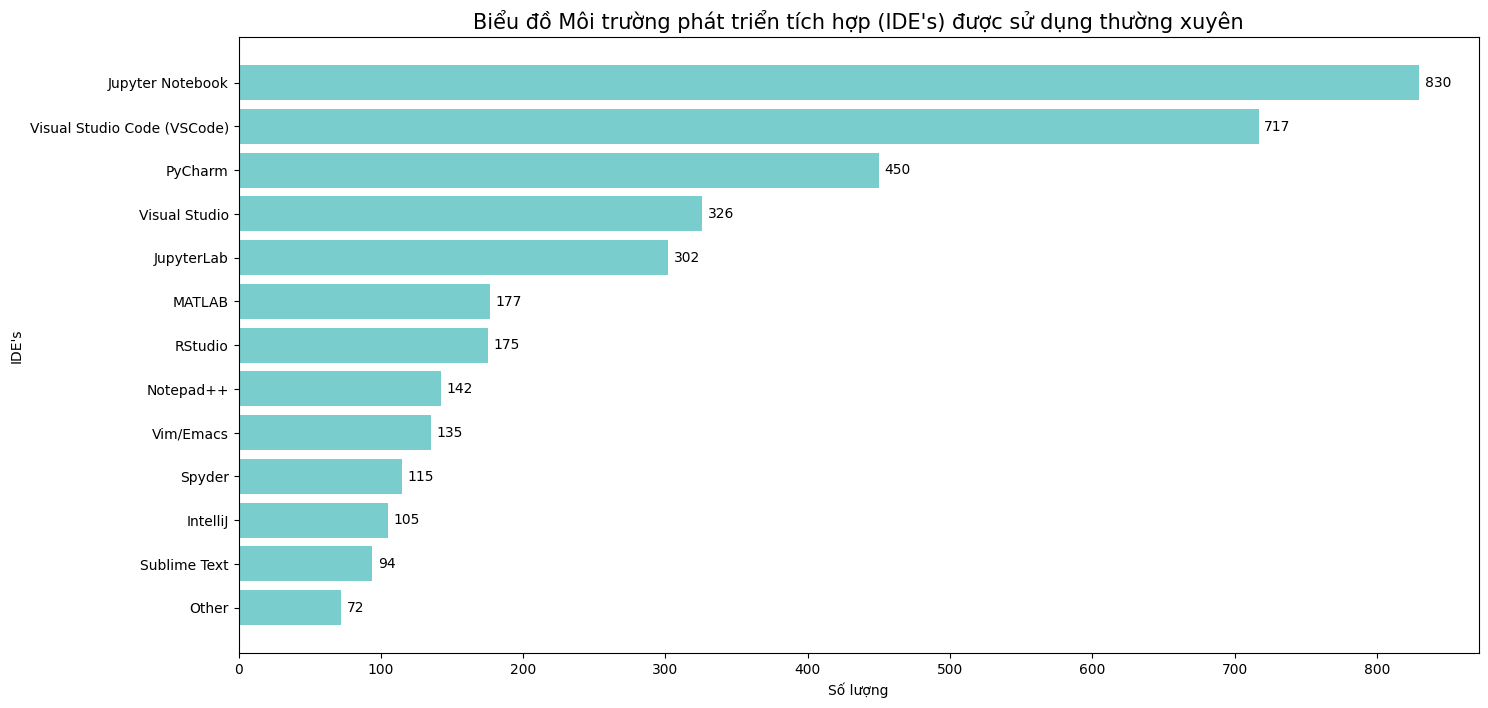

In [120]:
ides = ['Jupyter Notebook',
        'Visual Studio Code (VSCode)',
        'PyCharm','Visual Studio',
        'JupyterLab', 'MATLAB','RStudio',
        'Notepad++','Vim/Emacs','Spyder',
        'IntelliJ','Sublime Text', 'Other']

ides_value = []
for i in df_IDE:
    ides_value.append(df_IDE[i])

# Tạo biểu đồ cột ngang
plt.figure(figsize=(16, 8))
ides_plot = plt.barh(ides, ides_value, color="#79CDCD")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên
ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(ides_plot, padding=4)

# Đặt tên cho trục x, trục y và tên biểu đồ
ax.set_ylabel("IDE\'s")
ax.set_xlabel("Số lượng")
plt.title("Biểu đồ Môi trường phát triển tích hợp (IDE\'s) được sử dụng thường xuyên", loc="center", fontsize=15)


- _Lựa chọn biểu đồ_: Cột ngang (bar chart)  
    - Hiển thị so sánh giữa các nhóm: Biểu đồ cột ngang thường được sử dụng để so sánh các lượng người dùng giữa các ứng dụng IDE khác nhau. Điều này có thể giúp trực quan hóa sự khác biệt và tương quan giữa các ứng dụng.
    - Dễ đọc và so sánh: Biểu đồ cột ngang cho phép người đọc dễ dàng so sánh các giá trị vì chiều ngang của cột có thể đo lường độ dài. Điều này giúp hình dung mức độ khác biệt giữa các giá trị một cách trực quan.
    - Đặt trọng tâm vào giá trị: Trong biểu đồ cột ngang, giá trị của mỗi cột được đặt trên trục ngang, giúp tạo ra một trực quan hóa mạnh mẽ cho dữ liệu.  
    

- _Phân tích_:  
    - Trong biểu đồ trên, Jupyter Notebook và Visual Studio Code (VSCode) là hai môi trường phát triển phổ biến nhất, với số lượng người sử dụng lần lượt là 830 và 717. Điều này cho thấy sự ưa chuộng và độ phổ biến của hai IDE này trong việc phân tích dữ liệu và lập trình. Jupyter Notebook được ưa chuộng vì tính linh hoạt, khả năng tương tác và khả năng chia sẻ mã nguồn một cách dễ dàng, còn VSCode cho thấy tính linh hoạt và khả năng mở rộng của mình đã thu hút sự quan tâm của nhiều lập trình viên.
    - PyCharm, Visual Studio và JupyterLab cũng được sử dụng khá phổ biến, với số lượng người sử dụng lần lượt là 450, 326 và 302. Điều này cũng phần nào phản ánh chất lượng các tính năng, công cụ mà các IDE này hỗ trợ cho lập trình viên.
    - MATLAB, RStudio và Notepad++ cũng có mức độ sử dụng tương đối cao, với số lượng người sử dụng từ 142 đến 177.
    - Các môi trường phát triển như Vim / Emacs, Spyder, IntelliJ và Sublime Text có mức độ sử dụng thấp hơn so với các IDE trên.
    - Các môi trường phát triển khác: Có một số người dùng sử dụng các môi trường phát triển không thuộc danh sách trên, được ghi chung vào nhãn "Other" với số lượng là 72. Điều này cho thấy sự đa dạng trong lựa chọn IDE của người dùng.  
    
Tổng quan, các lựa chọn IDE của người dùng phụ thuộc vào nhiều yếu tố như tính linh hoạt, khả năng mở rộng, tính năng chuyên dụng và yêu cầu công việc cụ thể. Sự đa dạng trong lựa chọn IDE phản ánh sự đa dạng trong phong cách làm việc và ưu tiên của các lập trình viên và nhà phân tích dữ liệu.

## 2. Phân tích thư viện thường được sử dụng 

In [121]:
# Lấy dữ liệu cột và tính số lượng từng thư viện
df_lib = df['Do you use any of the following data visualization libraries on a regular basis?'].explode().value_counts().to_dict()
df_lib

{' Matplotlib ': 923,
 ' Seaborn ': 611,
 ' Plotly / Plotly Express ': 218,
 'None': 202,
 ' Ggplot / ggplot2 ': 200,
 ' Geoplotlib ': 43,
 ' D3 js ': 42,
 ' Bokeh ': 40,
 'Other': 37,
 ' Shiny ': 37,
 ' Leaflet / Folium ': 23,
 ' Pygal ': 14,
 ' Altair ': 13,
 ' Highcharter ': 8,
 ' Dygraphs ': 5}

In [122]:
# Loại bỏ các hàng dữ liệu có giá trị None
del df_lib['None']
df_lib

{' Matplotlib ': 923,
 ' Seaborn ': 611,
 ' Plotly / Plotly Express ': 218,
 ' Ggplot / ggplot2 ': 200,
 ' Geoplotlib ': 43,
 ' D3 js ': 42,
 ' Bokeh ': 40,
 'Other': 37,
 ' Shiny ': 37,
 ' Leaflet / Folium ': 23,
 ' Pygal ': 14,
 ' Altair ': 13,
 ' Highcharter ': 8,
 ' Dygraphs ': 5}

Text(0.5, 1.0, 'Biểu đồ Thư viện trực quan hóa dữ liệu được sử dụng thường xuyên')

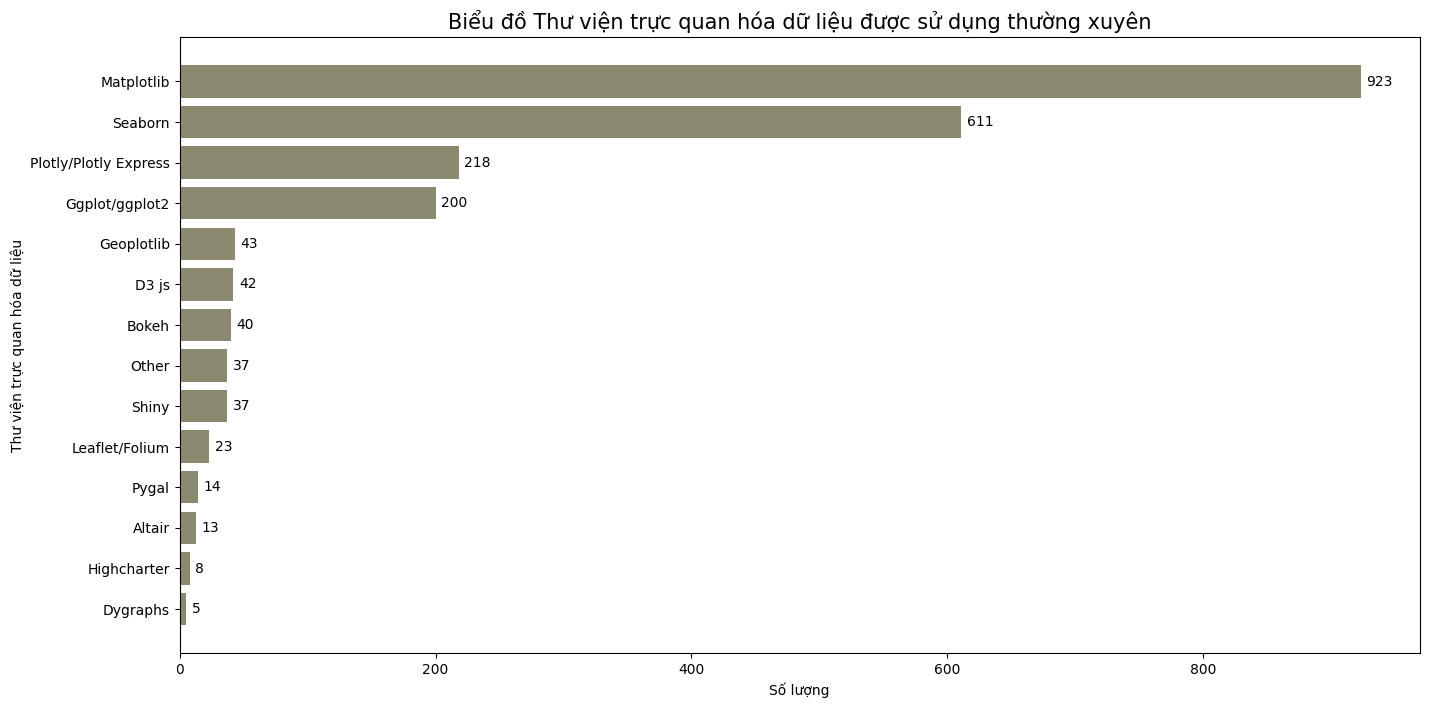

In [123]:
libs = ['Matplotlib',
        'Seaborn',
        'Plotly/Plotly Express',
        'Ggplot/ggplot2',
        'Geoplotlib',
        'D3 js',
        'Bokeh',
        'Other',
        'Shiny',
        'Leaflet/Folium',
        'Pygal',
        'Altair',
        'Highcharter',
        'Dygraphs']

libs_value = []
for i in df_lib:
    libs_value.append(df_lib[i])

# Tạo biểu đồ cột ngang
plt.figure(figsize=(16, 8))
libs_plot = plt.barh(libs, libs_value, color="#8B8970")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên
ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(libs_plot, padding=4)

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Thư viện trực quan hóa dữ liệu")
ax.set_xlabel("Số lượng")
plt.title("Biểu đồ Thư viện trực quan hóa dữ liệu được sử dụng thường xuyên", loc="center", fontsize=15)


- _Lựa chọn biểu đồ_: Cột ngang (bar chart)  
    - Hiển thị so sánh giữa các nhóm: Biểu đồ cột ngang giúp so sánh các lượng người dùng giữa các thư viện trực quan hóa khác nhau. Điều này có thể giúp trực quan hóa sự khác biệt và tương quan giữa các nhãn dữ liệu.
    - Dễ đọc và so sánh: Biểu đồ cột ngang cho phép người đọc dễ dàng so sánh các giá trị vì chiều ngang của cột có thể đo lường độ dài. Điều này giúp hình dung mức độ khác biệt giữa các giá trị một cách trực quan.
    - Đặt trọng tâm vào giá trị: Trong biểu đồ cột ngang, giá trị của mỗi cột được đặt trên trục ngang, giúp tạo ra một trực quan hóa mạnh mẽ cho dữ liệu.  
    

- _Phân tích_:  
    - Matplotlib là thư viện phổ biến nhất với 923 lượt đề cập. Matplotlib là một thư viện trực quan hóa dữ liệu đa nền tảng và mạnh mẽ trong Python.

    - Seaborn là thư viện trực quan hóa dữ liệu thứ hai phổ biến nhất với 611 lượt đề cập. Seaborn cung cấp các chức năng cao cấp cho việc trực quan hóa dữ liệu thống kê và có tích hợp tốt với Pandas.

    - Plotly/Plotly Express xếp thứ ba với 218 lượt đề cập. Plotly cung cấp các công cụ mạnh mẽ cho việc tạo ra các đồ thị tương tác và đồ họa web.

    - Ggplot/ggplot2, với 200 lượt đề cập, là một thư viện trực quan hóa dữ liệu phổ biến trong R. Nó dựa trên cú pháp "Grammar of Graphics" để tạo ra các đồ thị chất lượng cao.

    - Các thư viện như Geoplotlib, D3.js, Bokeh, Shiny và Leaflet/Folium cũng được đề cập trong số lần nhưng có số lượng thấp hơn so với các thư viện khác. Chúng được sử dụng chủ yếu cho việc trực quan hóa dữ liệu địa lý và dữ liệu tương tác.

    - Các thư viện Pygal, Altair, Highcharter và Dygraphs cũng được đề cập nhưng có số lượng thấp. Chúng cung cấp các công cụ trực quan hóa dữ liệu đa dạng nhưng ít phổ biến hơn so với các thư viện khác.

Tổng quan, Matplotlib và Seaborn là hai thư viện phổ biến nhất cho trực quan hóa dữ liệu trong Python, trong khi Plotly cung cấp tính năng tương tác cao. Ggplot/ggplot2 là thư viện phổ biến trong R. Sự lựa chọn thư viện trực quan hóa dữ liệu cụ thể phụ thuộc vào yêu cầu của bạn và sự thoải mái với các công cụ cụ thể.

## 3. Phân tích tương quan số năm kinh nghiệm và công cụ IDE thường dùng


In [159]:
# Lọc các hàng có ô IDE giá trị None
df_new = df.dropna(subset=['Which of the following integrated development environments (IDE\'s) do you use on a regular basis?'])
df_new = df_new[df_new["Which of the following integrated development environments (IDE\'s) do you use on a regular basis?"].apply(lambda x: x != ('None',))]
df_new

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,(University Courses (resulting in a university...,"(Kaggle (notebooks, competitions, etc),)",Master’s degree,1-3 years,"(Python, SQL)","( PyCharm , Jupyter Notebook)","(None,)","( Matplotlib , Seaborn )",1-2 years,"( Scikit-learn ,)","(Linear or Logistic Regression, Decision Trees...","(No, I do not download pre-trained model weigh...",NaN
2,174,25-29,Woman,China,Yes,"(Kaggle Learn Courses, University Courses (res...","(University courses, Online courses (Coursera,...",Master’s degree,< 1 years,"(Python, MATLAB)","( Visual Studio , MATLAB , Jupyter Notebook)","(Colab Notebooks, Google Cloud Vertex AI Workb...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"(Udemy,)","(Online courses (Coursera, EdX, etc),)",Master’s degree,3-5 years,"(Python,)","( Visual Studio Code (VSCode) , Jupyter Noteb...","( Kaggle Notebooks, Colab Notebooks)","( Seaborn ,)",2-3 years,"( Scikit-learn , PyTorch , Xgboost , Light...","(Decision Trees or Random Forests, Dense Neura...","( Huggingface Models ,)","(Kaggle (notebooks, forums, etc),)"
4,283,22-24,Woman,China,Yes,(University Courses (resulting in a university...,"(University courses, Social media platforms (R...",I prefer not to answer,< 1 years,"(Python, MATLAB, Other)","( Visual Studio , PyCharm , MATLAB )","(Google Cloud Vertex AI Workbench ,)","(None,)",Under 1 year,"( TensorFlow ,)","(None,)","(Other storage services (i.e. google drive),)","(Other,)"
5,492,40-44,Man,Japan,No,"(Kaggle Learn Courses,)","(Video platforms (YouTube, Twitch, etc), Kaggl...",No formal education past high school,< 1 years,"(Python,)","( Notepad++ , Jupyter Notebook)","(None,)","(None,)",I do not use machine learning methods,NaN,NaN,NaN,"(Kaggle (notebooks, forums, etc),)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,285,18-21,Man,Viet Nam,Yes,"(Coursera, University Courses (resulting in a ...","(Online courses (Coursera, EdX, etc), Video pl...",Master’s degree,1-3 years,"(Python, C++)","( Sublime Text , Jupyter Notebook)","(None,)","( Matplotlib , Seaborn )",1-2 years,"( Scikit-learn , TensorFlow , Keras )","(Linear or Logistic Regression, Decision Trees...","( TensorFlow Hub , Kaggle datasets )","(Course Forums (forums.fast.ai, Coursera forum..."
1535,43922,18-21,Man,Japan,Yes,(University Courses (resulting in a university...,"(Online courses (Coursera, EdX, etc),)",Bachelor’s degree,1-3 years,"(Python,)","( Visual Studio Code (VSCode) ,)","( Kaggle Notebooks,)","( Matplotlib , Seaborn )",1-2 years,NaN,NaN,NaN,NaN
1536,617,50-54,Man,Japan,No,"(None,)","(Kaggle (notebooks, competitions, etc),)",I prefer not to answer,20+ years,"(Python,)","(JupyterLab , Visual Studio Code (VSCode) , ...","(Colab Notebooks, Amazon Sagemaker Studio Lab )","( Matplotlib , Seaborn , Ggplot / ggplot2 , ...",10-20 years,"( Scikit-learn , PyTorch , Xgb

In [160]:
# Lấy ra dữ liệu 2 cột cần thiết
df_exp = df_new[['For how many years have you been writing code and/or programming?', 'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?']]
df_exp

,For how many years have you been writing code and/or programming?,Which of the following integrated development environments (IDE's) do you use on a regular basis?
1,1-3 years,"( PyCharm , Jupyter Notebook)"
2,< 1 years,"( Visual Studio , MATLAB , Jupyter Notebook)"
3,3-5 years,"( Visual Studio Code (VSCode) , Jupyter Noteb..."
4,< 1 years,"( Visual Studio , PyCharm , MATLAB )"
5,< 1 years,"( Notepad++ , Jupyter Notebook)"
...,...,...
1533,1-3 years,"( Sublime Text , Jupyter Notebook)"
1535,1-3 years,"( Visual Studio Code (VSCode) ,)"
1536,20+ years,"(JupyterLab , Visual Studio Code (VSCode) , ..."
1537,1-3 years,"( PyCharm , Notepad++ , Jupyter Notebook)"


In [193]:
# Sắp xếp lại theo mốc kinh nghiệm
exp_count = df_exp.explode('Which of the following integrated development environments (IDE\'s) do you use on a regular basis?').value_counts().reset_index(name='Freq')
values_time = ['< 1 years','1-3 years', '3-5 years', '5-10 years', '10-20 years','20+ years']
exp_count['For how many years have you been writing code and/or programming?'] = pd.Categorical(exp_count['For how many years have you been writing code and/or programming?'], categories=values_time, ordered=True)
exp_count = exp_count.sort_values(by='For how many years have you been writing code and/or programming?')
exp_count

,For how many years have you been writing code and/or programming?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Freq
73,< 1 years,IntelliJ,8
70,< 1 years,Other,10
60,< 1 years,Sublime Text,17
4,< 1 years,Jupyter Notebook,151
29,< 1 years,MATLAB,36
...,...,...,...
36,20+ years,JupyterLab,30
51,20+ years,RStudio,22
42,20+ years,Vim / Emacs,26
67,20+ years,Other,11


Text(0.5, 1.0, 'Biểu đồ sử dụng Môi trường phát triển tích hợp theo số năm kinh nghiệm')

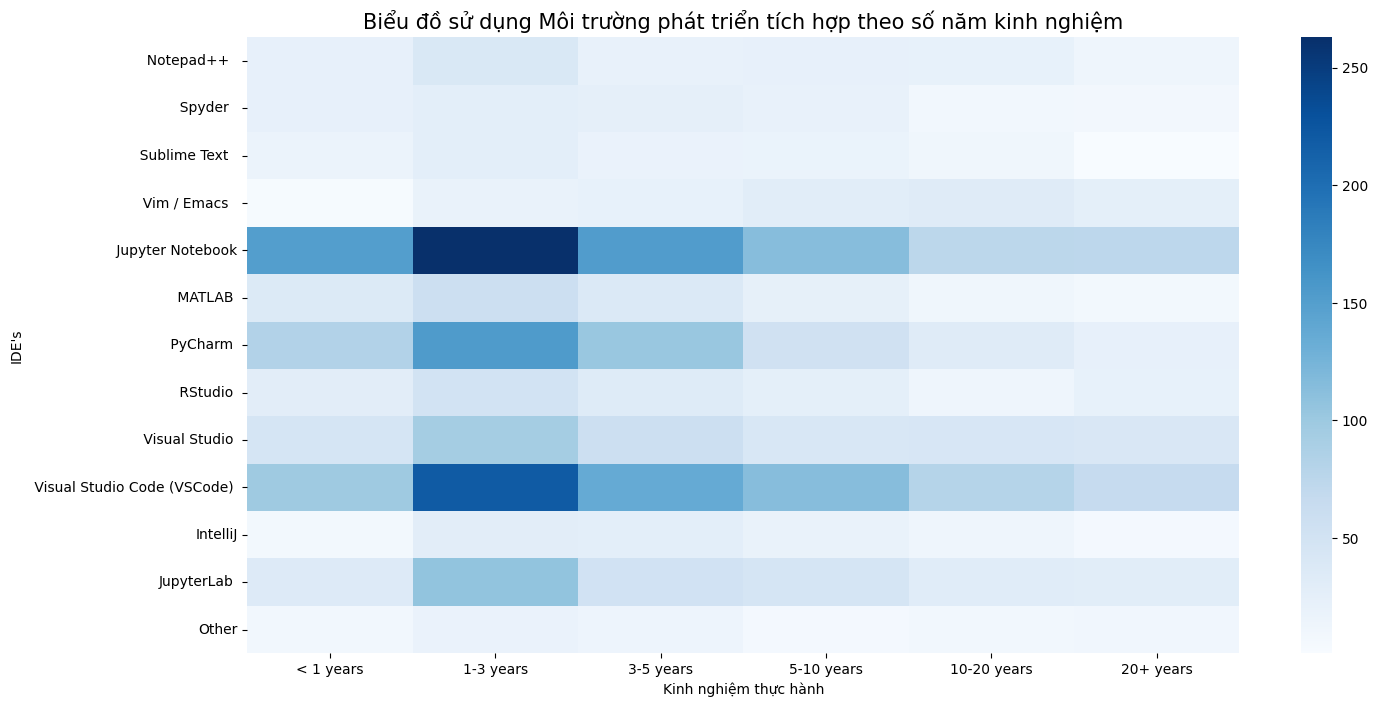

In [196]:
#Vẽ biểu đồ
exp_pivot = exp_count.pivot(index='Which of the following integrated development environments (IDE\'s) do you use on a regular basis?', 
columns='For how many years have you been writing code and/or programming?', 
values=  'Freq')
exp_pivot

plt.subplots(figsize=(16,8))
ax = sns.heatmap(exp_pivot, cmap='Blues')
ax.set(xlabel="Kinh nghiệm thực hành", ylabel= "IDE's")
plt.title("Biểu đồ sử dụng Môi trường phát triển tích hợp theo số năm kinh nghiệm", fontsize=15)


- _Lựa chọn biểu đồ_: Heatmap  
    - Trực quan hóa mức độ tương quan: Heatmap là một công cụ mạnh mẽ để hiển thị mức độ tương quan giữa các biến trong một ma trận hoặc bảng dữ liệu. Bằng cách sử dụng màu sắc, heatmap có thể nhanh chóng và dễ hiểu cho thấy sự khác biệt và mối quan hệ giữa các giá trị.
    - Đánh giá định lượng và sự phân bố: Heatmap cung cấp một cách hiệu quả để đánh giá định lượng và phân bố của dữ liệu trong một ma trận. Bằng cách sử dụng màu sắc, heatmap giúp người dùng nhìn nhận sự khác biệt và tương quan giữa các giá trị dễ dàng hơn so với việc sử dụng bảng dữ liệu thông thường.
    - Dễ tạo và trực quan: Heatmap có thể được tạo nhanh chóng bằng sử dụng các thư viện trực quan hóa dữ liệu như Matplotlib, Seaborn hoặc Plotly. Chúng cung cấp các phương thức và hàm dễ sử dụng để tạo và tùy chỉnh biểu đồ heatmap. Đồng thời, heatmap có một cấu trúc trực quan, giúp người dùng dễ dàng hiểu và phân tích dữ liệu.
    - Phát hiện mẫu và xu hướng: Heatmap có khả năng tạo ra sự nhấn mạnh và phát hiện mẫu và xu hướng trong dữ liệu. Khi các giá trị cao hoặc thấp được đại diện bằng các màu tương ứng, người dùng có thể nhanh chóng nhận biết những phần tử nổi bật và sự phân bố của chúng trong biểu đồ.
    

- _Phân tích_:  
    - Biểu đồ trên thể hiện sự phân bố việc sử dụng công cụ IDE theo kinh nghiệm lập trình của người được khảo sát.
    - Ta có thể thấy Jupyter Notebook và VSCode là 2 dải màu nổi nhất trong biểu đồ, điều này cho thấy tính ưa chuộng của phần lớn lập trình viên 4 nước châu Á (Trung Quốc, Việt Nam, Hàn Quốc, Nhật Bản) đối với 2 ứng dụng này và cũng cho thấy sự bền bỉ, chất lượng khi có sự phổ biến mạnh mẽ trong từng nhóm kinh nghiệm.
    - Các ứng dụng IDE có dải màu nổi bật tiếp theo là Visual Studio và Pycharm, tuy kém phổ biến hơn 2 ứng dụng trên nhưng cũng là lựa chọn hàng đầu của các lập trình viên, đặc biệt trong nhóm kinh nghiệm 10 năm trở xuống.
    - Các IDE còn lại đều có người sử dụng nhưng sẽ được dùng trong lĩnh vực, tình huống nhất định nên khả năng hấp dẫn kém hơn so với các IDE trên.

Tóm lại, tùy theo kinh nghiệm cá nhân và tình huống sử dụng mà lập trình viên, người dùng sẽ chọn IDE phù hợp cho công việc của mình. Nhưng các IDE sau vẫn sẽ là sự lựa chọn hàng đầu của các lập trình viên: Jupyter Notebook, VSCode.